## Plan

- model
- train
- generate data to fit
- compare my model to scikit-learn or pytorch model
- add HPC elements
-try QML?


- generalise to n-order polynomials


Linear model

exact  (-5.891221299436447, 5.766163160241131)
final  (-5.619361538417863, 5.873132075196875)


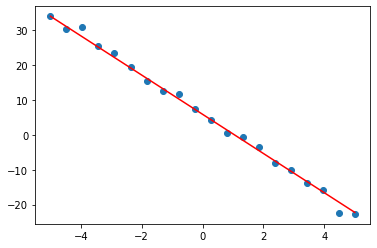

exact  (1.8035308922512687, -8.932997758933784)
final  (1.739258837143407, -8.64702876694475)


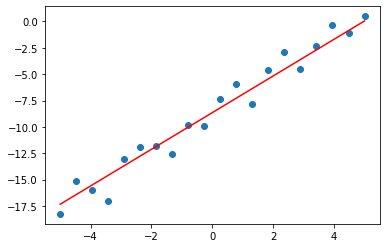

exact  (9.426876599133955, -2.9926253353036136)
final  (9.135432274423708, -2.761022093132227)


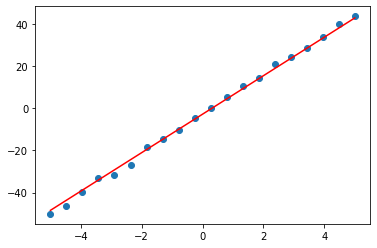

exact  (-5.020328015327149, -3.744061394302758)
final  (-5.265386791790712, -3.381001263825353)


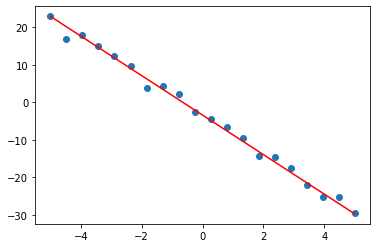

exact  (6.734121610420484, 9.719606553642244)
final  (6.31178940305444, 9.897390553362547)


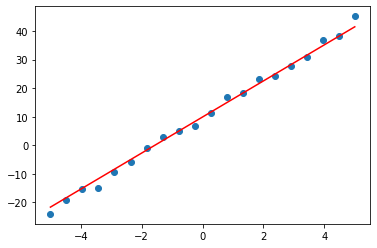

exact  (4.998948697430244, -3.393845215591929)
final  (5.055330935473385, -3.546878198636063)


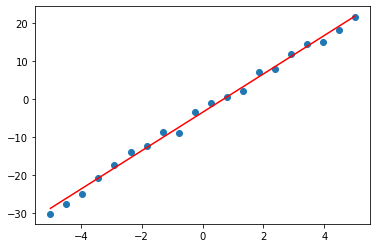

exact  (5.904416355842287, -7.229180553629311)
final  (5.826892335814467, -7.652864264045236)


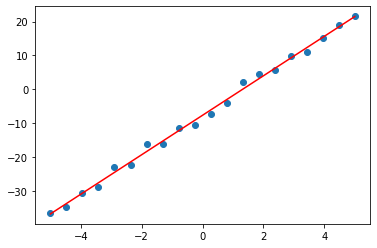

exact  (9.775240647791957, -3.1875683318847763)
final  (9.862241809206527, -2.937055558911569)


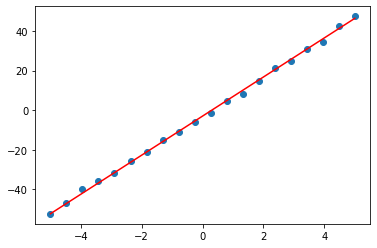

exact  (-4.309125602556307, -3.712778258178866)
final  (-4.174479040273335, -3.767254837896803)


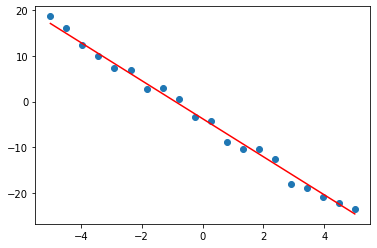

exact  (-9.730854009002357, 0.009106373258108036)
final  (-9.768039539644997, 0.12301172556912013)


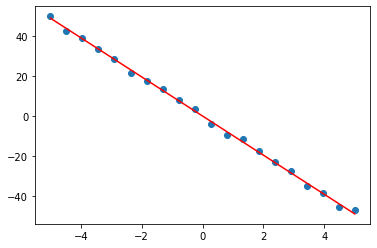

In [28]:
from training import *
from models import *
import random
import matplotlib.pyplot as plt
for i in range(5):
    m = random.uniform(-10,10)
    c = random.uniform(-10,10)
    model = TrainLinModel()
    linmodel = LinModel(m =m, c=c)
    epochs = 100

    x_data = []
    y_data = []
    linmodel_data = linmodel.true_data(messy=True)

    for elem in linmodel_data:
        x_data.append(elem[0]) 
        y_data.append(elem[1]) 


    for i in range(epochs):
        
        order = list(range(len(x_data)))
        random.shuffle(order)
        for j in order:
            
            ## init
            input_data = x_data[j]
            output = model.f(input_data)
            answer = y_data[j]

            ## algo
            dloss_w1 = model.d_loss_func(x_data[j], output, answer)#
            dloss_w2 = model.d_loss_func(x_data[j], output, answer) #
            dloss_db = model.d_loss_func(1, output, answer)
            
            model.descent([dloss_w1, dloss_w2, dloss_db],learning_rate=0.01)

    ## plot   
    plot_x = np.linspace(min(x_data), max(x_data), 20)
    print("exact ", (m,c))
    print("final ", (sum(model.w), model.b))
    plt.scatter(x_data, y_data)
    plt.plot(plot_x, [model.predict_func(x_pt) for x_pt in plot_x], color = "red")
    plt.show()


Quadratic

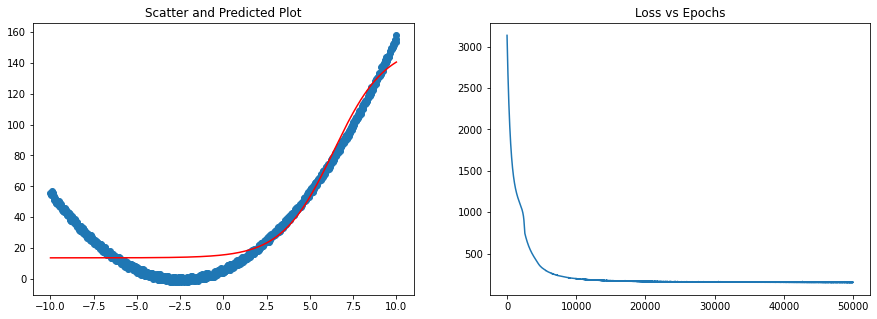

In [3]:
from training import *
from models import *
import matplotlib.pyplot as plt
import random

quadtrain = TrainQuadModel()
quadmodel = QuadModel()
epochs = 50000

x_data = []
y_data = []
epochlist = []
losslist = []

quadmodel_data = quadmodel.true_data(messy=True)

for elem in quadmodel_data:
    x_data.append(elem[0]) 
    y_data.append(elem[1]) 


for i in range(epochs):
    
    order = list(range(len(x_data)))
    random.shuffle(order)
    for j in order:
        
        ## init
        x = x_data[j] ##input
        output = quadtrain.func(x)
        answer = y_data[j]
        
        ## algo
        gradients = [quadtrain.dloss_dw1(output, answer,x), # w0
                     quadtrain.dloss_dw2(output, answer,x), # w1
                     quadtrain.dloss_db1(output, answer,x), # b1
                     quadtrain.dloss_db2(output, answer,x)] # b2
        
        quadtrain.descent(gradients=gradients,learning_rate=0.0000005)

    loss = np.mean([(quadtrain.func(x) - y)**2 for x, y in zip(x_data, y_data)])
    # print(f"Epoch {i+1}/{epochs}, Loss: {loss}")
    epochlist.append(i+1)
    losslist.append(loss)
    
    ## plot   
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the scatter and predicted plot on the left subplot
plot_x = np.linspace(min(x_data), max(x_data), 500)
axs[0].scatter(x_data, y_data)
axs[0].plot(plot_x, [quadtrain.func(x_pt) for x_pt in plot_x], color="red")
axs[0].set_title('Scatter and Predicted Plot')

# Plotting the loss against epochs on the right subplot
axs[1].plot(epochlist, losslist)
axs[1].set_title('Loss vs Epochs')

# Display the plots
plt.show()

Learning quadratic function using PyTorch

Training complete


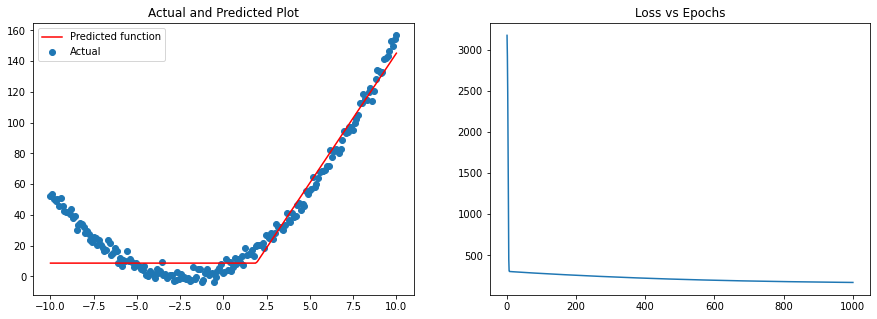

In [1]:
from training import *
import matplotlib.pyplot as plt
from models import *
# train
torch_quadtrainer = PytorchQuadTrain(epochs=1000, learning_rate=0.001)

# results
x_test, y_pred = torch_quadtrainer.train()
x_data, y_data = torch_quadtrainer.data
epochs_list = torch_quadtrainer.results["epochs"]
losses = torch_quadtrainer.results["losses"]

# Plotting the results
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(x_data, y_data, label='Actual')
axs[0].plot(x_test.numpy(), y_pred.numpy(), 'r', label='Predicted function')
axs[0].legend()
axs[0].set_title('Actual and Predicted Plot')

axs[1].plot(epochs_list, losses)
axs[1].set_title('Loss vs Epochs')

# Display the plots
plt.show()

In [ ]:
from training import *
import matplotlib.pyplot as plt
# train
torch_polytrainer = PytorchPolyTrain(epochs=1000, learning_rate=0.001)

# results
x_test, y_pred = torch_polytrainer.train()
x_data, y_data = torch_polytrainer.data
epochs_list = torch_polytrainer.results["epochs"]
losses = torch_polytrainer.results["losses"]

# Plotting the results
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(x_data, y_data, label='Actual')
axs[0].plot(x_test.numpy(), y_pred.numpy(), 'r', label='Predicted function')
axs[0].legend()
axs[0].set_title('Actual and Predicted Plot')

axs[1].plot(epochs_list, losses)
axs[1].set_title('Loss vs Epochs')

# Display the plots
plt.show()